In [3]:
import pandas as pd
import numpy as np
import math

# Single case
one slection strategy, one model

In [4]:
def readEvalInfo(filePath):
    return pd.read_csv(filePath)[~ pd.read_csv(filePath)['eval_loss'].isnull()].reset_index(drop=True)

In [26]:
modelName = 'distilbert-base'
selectionNum = 2

evalInfo_plutchik_clean_noCombin = readEvalInfo(f'./trainingMetric/[Plutchik] {selectionNum}Select/TI-{modelName}-clean-noCombin-v1.csv')
evalInfo_plutchik_clean = readEvalInfo(f'./trainingMetric/[Plutchik] {selectionNum}Select/TI-{modelName}-clean-v1.csv')
evalInfo_plutchik_original_noCombin = readEvalInfo(f'./trainingMetric/[Plutchik] {selectionNum}Select/TI-{modelName}-original-plutchik-noCombin-v1.csv')
evalInfo_plutchik_original = readEvalInfo(f'./trainingMetric/[Plutchik] {selectionNum}Select/TI-{modelName}-original-plutchik-v1.csv')

In [27]:
def drawOneSelectionPlutchik(evalInfo_plutchik_clean_noCombin, 
                             evalInfo_plutchik_clean, 
                             evalInfo_plutchik_original_noCombin, 
                             evalInfo_plutchik_original):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = (13.0, 8.0) 
    x = range(16)
    y0 = [ round(x*100, 2) for x in evalInfo_plutchik_original['eval_accuracy']]
    y1 = [ round(x*100, 2) for x in evalInfo_plutchik_original_noCombin['eval_accuracy']]
    y2 = [ round(x*100, 2) for x in evalInfo_plutchik_clean_noCombin['eval_accuracy']]
    y3 = [ round(x*100, 2) for x in evalInfo_plutchik_clean['eval_accuracy']]

    plt.plot(x, y0, label='Before Data Cleaning - w/o data combination', marker='v')
    for a,b in zip(x, y0): 
        plt.text(a, b+0.2, str(b))

    plt.plot(x, y1, label='Before Data Cleaning - w/ data combination', marker='v')
    for a,b in zip(x, y1): 
        plt.text(a, b-0.8, str(b))

    plt.plot(x, y2, label='After Data Cleaning - w/o data combination', marker='v')
    for a,b in zip(x, y2): 
        plt.text(a, b+0.4, str(b))

    plt.plot(x, y3, label= 'After Data Cleaning - w/ data combination', marker='v')
    for a,b in zip(x, y3): 
        plt.text(a, b+0.5, str(b))

    plt.title(f"{modelName}- in {selectionNum} selection - plutchik")
    plt.legend()
    plt.show()

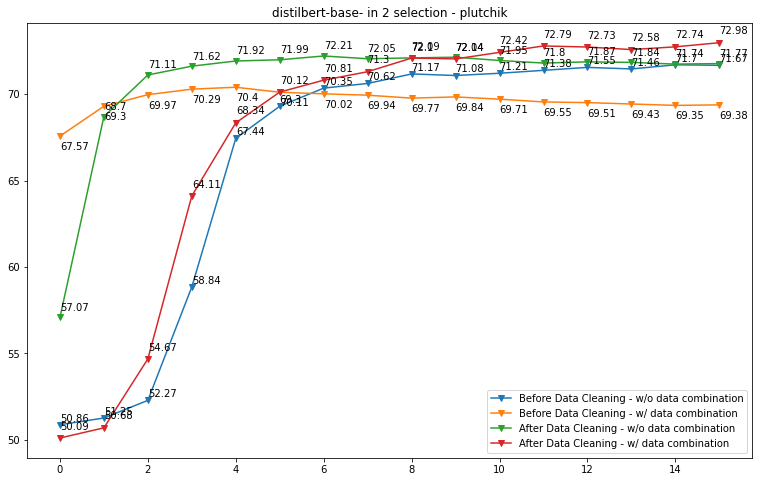

In [28]:
drawOneSelectionPlutchik(evalInfo_plutchik_clean_noCombin, evalInfo_plutchik_clean, evalInfo_plutchik_original_noCombin, evalInfo_plutchik_original)

# for one selection

In [42]:
selectionNum = 2
currentTask = 'Emotion'

In [53]:
def singleSelectionDraw(selectionNum, currentTask):
    import os
    import matplotlib.pyplot as plt
    # plt.rcParams['figure.figsize'] = (13.0, 8.0) 
    x = range(16)
    Path = f'./trainingMetric/[{currentTask}] {selectionNum}Select/'
    filelist = os.listdir(Path)
    for eachFileName in filelist:
        if eachFileName.startswith('TI-'):
            currentEvalInfo = readEvalInfo(Path + eachFileName)
            y0 = [ round(x*100, 2) for x in currentEvalInfo['eval_accuracy']]
            plt.plot(x, y0, label=eachFileName.split("TI")[1].replace("-", " ").split(".csv")[0], marker='v')
            # for a,b in zip(x, y0): 
            #     plt.text(a, b+0.2, str(b))
    plt.title(f" in {selectionNum} selection - {currentTask}")
    plt.legend()
    plt.grid(linestyle = '--', linewidth = 0.5)
    # plt.show()

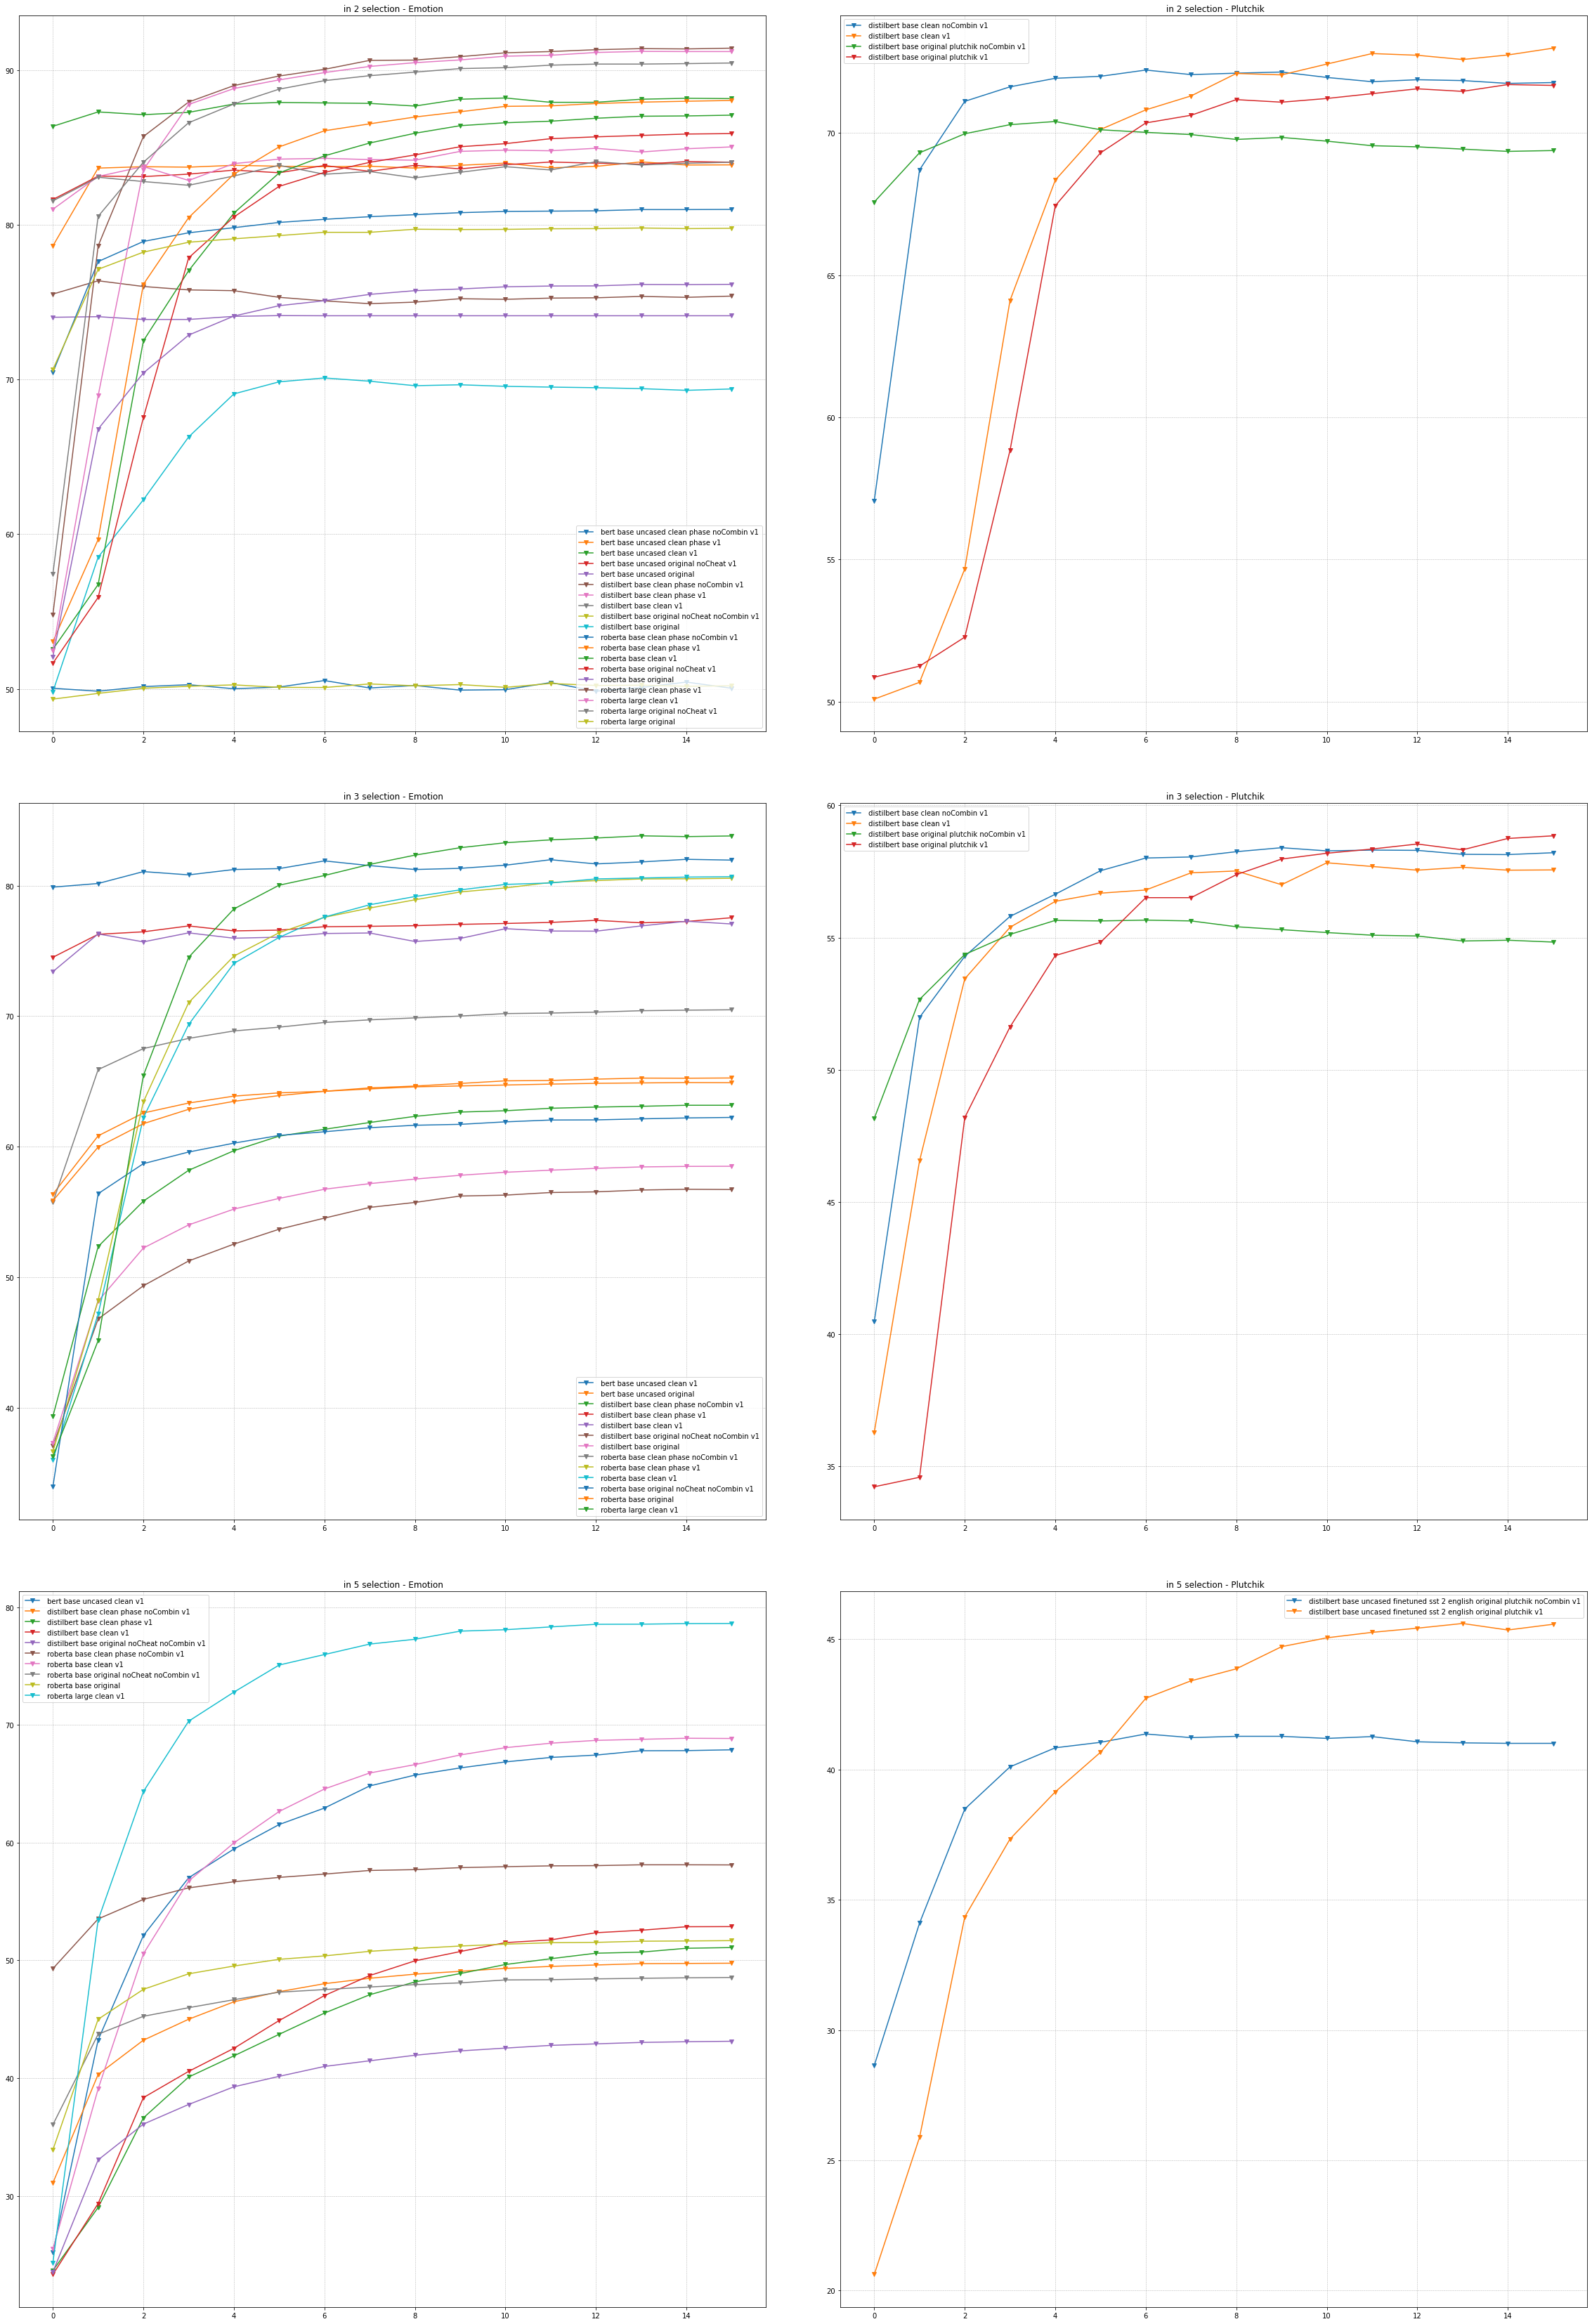

In [58]:
plt.rcParams['figure.figsize'] = (40.0, 50.0) 
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.subplot(3,2,1)
singleSelectionDraw(2, 'Emotion')
plt.subplot(3,2,2)
singleSelectionDraw(2, 'Plutchik')
plt.subplot(3,2,3)
singleSelectionDraw(3, 'Emotion')
plt.subplot(3,2,4)
singleSelectionDraw(3, 'Plutchik')
plt.subplot(3,2,5)
singleSelectionDraw(5, 'Emotion')
plt.subplot(3,2,6)
singleSelectionDraw(5, 'Plutchik')
plt.show()

In [22]:
evaluationSpecificInfo_sentenceRemoved = pd.read_csv("./trainingMetric/evaluationSpecificInfo-sentenceRemoved-v1.csv", index_col=0)
evaluationSpecificInfo_withDataCleaning = pd.read_csv("./trainingMetric/evaluationSpecificInfo-withDataCleaning-v1.csv", index_col=0)
evaluationSpecificInfo_keepPhaseEmo_withoutPlutchikVoting = pd.read_csv("./trainingMetric/evaluationSpecificInfo-keepPhaseEmo-withoutPlutchikVoting-v1.csv", index_col=0)
evaluationSpecificInfo_keepPhaseEmo = pd.read_csv("./trainingMetric/evaluationSpecificInfo-keepPhaseEmo-v1.csv", index_col=0)

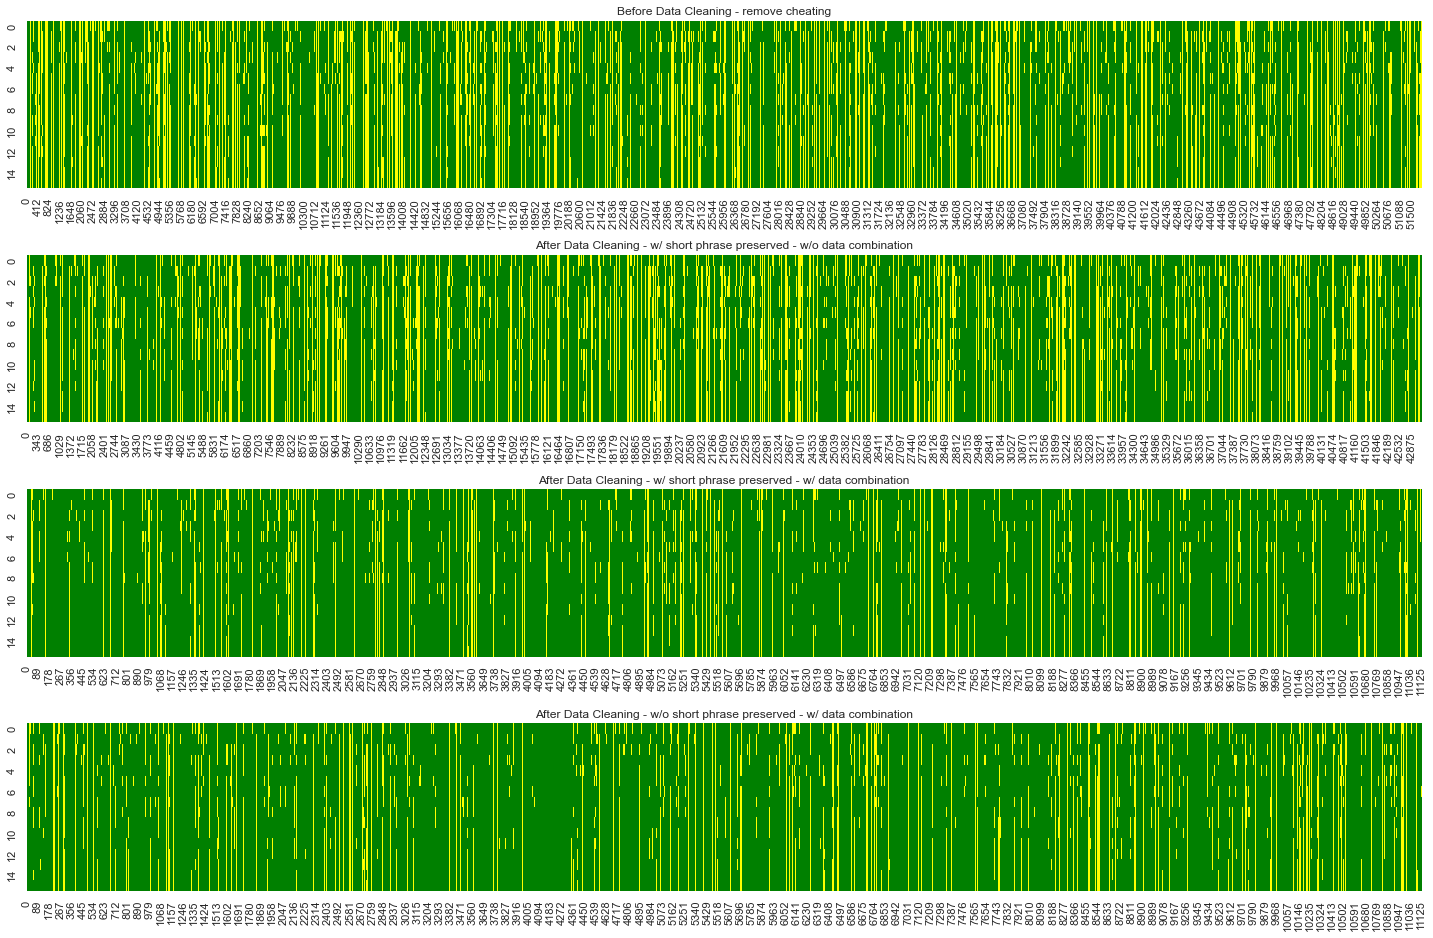

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
plt.subplots_adjust(hspace=0.4, wspace=0.2)
sns.set(rc = {'figure.figsize':(25,16)})

plt.subplot(4,1,1)
plt.title('Before Data Cleaning - remove cheating')
g = sns.heatmap(np.transpose(evaluationSpecificInfo_sentenceRemoved), 
            cbar = False, 
            cmap= LinearSegmentedColormap.from_list("", ["green", "yellow"]))

plt.subplot(4,1,2)
plt.title('After Data Cleaning - w/ short phrase preserved - w/o data combination')
g = sns.heatmap(np.transpose(evaluationSpecificInfo_keepPhaseEmo_withoutPlutchikVoting), 
            cbar = False, 
            cmap= LinearSegmentedColormap.from_list("", ["green", "yellow"]))

plt.subplot(4,1,3)
plt.title('After Data Cleaning - w/ short phrase preserved - w/ data combination')
g = sns.heatmap(np.transpose(evaluationSpecificInfo_keepPhaseEmo), 
            cbar = False, 
            cmap= LinearSegmentedColormap.from_list("", ["green", "yellow"]))

plt.subplot(4,1,4)
plt.title('After Data Cleaning - w/o short phrase preserved - w/ data combination')
g = sns.heatmap(np.transpose(evaluationSpecificInfo_withDataCleaning), 
            cbar = False, 
            cmap= LinearSegmentedColormap.from_list("", ["green", "yellow"]))

51891

array([7.07106781, 6.71751442, 6.36396103, 6.01040764, 5.65685425,
       5.30330086, 4.94974747, 4.59619408, 4.24264069, 3.8890873 ,
       3.53553391, 3.18198052, 2.82842712, 2.47487373, 2.12132034,
       1.76776695, 1.41421356, 1.06066017, 0.70710678, 0.35355339,
       0.        , 0.35355339, 0.70710678, 1.06066017, 1.41421356,
       1.76776695, 2.12132034, 2.47487373, 2.82842712, 3.18198052,
       3.53553391, 3.8890873 , 4.24264069, 4.59619408, 4.94974747,
       5.30330086, 5.65685425, 6.01040764, 6.36396103, 6.71751442])